In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error
import pydmd
import backtrader as bt
import yfinance as yf

import backtrader.analyzers as btanalyzers
from datetime import datetime
import backtrader.feeds as btfeeds
import math


In [101]:
sym = pd.read_csv("DATA/nse100_SYM.csv",header=None) 
sym = sym[0].tolist()
SYM =[ i + ".NS" for i in sym]

In [102]:
df = pd.DataFrame()
matx = pd.read_csv("DATA/NSE100.csv",header=None) #VARIABLE 1
matx = pd.DataFrame(matx.transpose())
matx = matx.fillna(0)

In [103]:
# function returns the index of the stock in the matrix
def get_index(sym):
    return SYM.index(sym)
    

In [104]:
def dmd_pred(j,i=12) :
    # creating the matrix mat 
    # i days are trained j th day from last 
    mat = matx.iloc[:, -(i)+j:j]
    mat=mat.to_numpy()


    # dmd 
    dmd = pydmd.DMD(svd_rank=mat.shape[1])
    dmd.fit(mat)
    d_ind = np.argmax(np.abs(dmd.amplitudes.real))


    if any(np.abs(dmd.eigs.real)>1) and dmd.amplitudes.real[d_ind] > 0 :
    # if np.abs(dmd.eigs.real[d_ind])>1 and dmd.eigs.imag[d_ind] == 0 and dmd.amplitudes.real[d_ind] > 0 :
        d_ind = np.argsort(dmd.modes[:,d_ind].real)[-5:]
        return (True,d_ind)
 
        
 
    else:
        return (False,[0 ,0 ,0 ,0 ,0])



In [112]:
def portfolio(i,max) :
    cash = 1000000
    portfolio = []
    st1 = 0
    st2 = 0
    st3 = 0
    st4 = 0
    st5 = 0
    invest = True
    for j in range(max+2,len(matx.columns)):
        if dmd_pred(j)[0]:
            if invest == True:
                p = dmd_pred(j,i)
                p=p[1]
                s1 = matx[j][p[0]]
                s2 = matx[j][p[1]]
                s3 = matx[j][p[2]]
                s4 = matx[j][p[3]]
                s5 = matx[j][p[4]]
                if s1 != 0:
                    st1 = math.floor((cash/5)/s1)
                if s2 != 0:
                    st2 = math.floor((cash/5)/s2)
                if s3 != 0:
                    st3 = math.floor((cash/5)/s3)
                if s4 != 0:
                    st4 = math.floor((cash/5)/s4)
                if s5 != 0:
                    st5 = math.floor((cash/5)/s5)
                cas = cash - st1*s1- st2*s2- st3*s3- st4*s4- st5*s5
                invest = False

        else :
            if st1 != 0:
                s1 = matx[j][p[0]]
                s2 = matx[j][p[1]]
                s3 = matx[j][p[2]]
                s4 = matx[j][p[3]]
                s5 = matx[j][p[4]]
                
                cash = cas + st1*s1+ st2*s2+ st3*s3+ st4*s4+ st5*s5
                st1 = 0
                invest = True
        
        portfolio.append(cash)

    performace = (cash/1000000)*100
    print(i," -->  PERFORMANCE :" , performace)
    return (portfolio,performace)



In [113]:
max = 20
port=[]
perf=[]
for i in range(2,max):
    P = portfolio(i,max)
    perf.append(P[0])
    port.append(P[1])


2  -->  PERFORMANCE : 189.8509399999998
3  -->  PERFORMANCE : 105.35767500000037
4  -->  PERFORMANCE : 156.2389349999997
5  -->  PERFORMANCE : 131.61424500000032
6  -->  PERFORMANCE : 130.54812499999952
7  -->  PERFORMANCE : 105.24661500000003
8  -->  PERFORMANCE : 199.32939000000033
9  -->  PERFORMANCE : 147.428705
10  -->  PERFORMANCE : 245.46058500000046
11  -->  PERFORMANCE : 183.62453
12  -->  PERFORMANCE : 205.27949999999998
13  -->  PERFORMANCE : 146.4820249999994
14  -->  PERFORMANCE : 135.1030899999999
15  -->  PERFORMANCE : 94.80523499999984
16  -->  PERFORMANCE : 149.0915149999997
17  -->  PERFORMANCE : 66.13107000000012
18  -->  PERFORMANCE : 137.7595250000002
19  -->  PERFORMANCE : 106.90628500000052


Text(0.5, 1.0, 'Performance of DMD different training days')

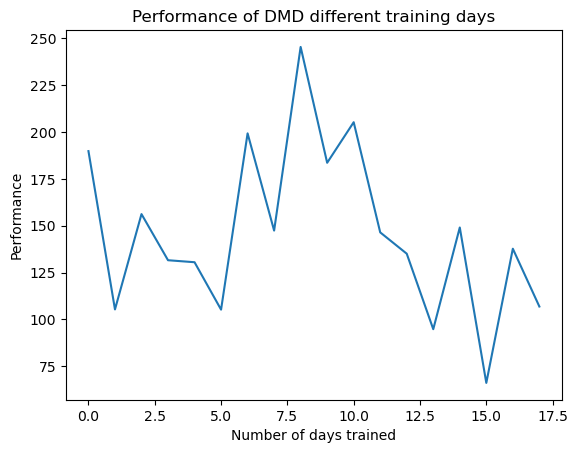

In [114]:
plt.plot(port)
plt.xlabel("Number of days trained")
plt.ylabel("Performance")
plt.title("Performance of DMD different training days")

Text(0.5, 1.0, 'Portfolio value for 2 days trained')

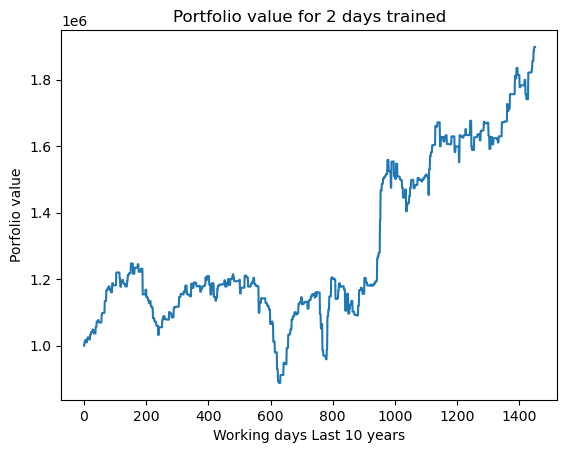

In [115]:
plt.plot(perf[0])
plt.xlabel("Working days Last 10 years")
plt.ylabel("Porfolio value")
plt.title("Portfolio value for 2 days trained")

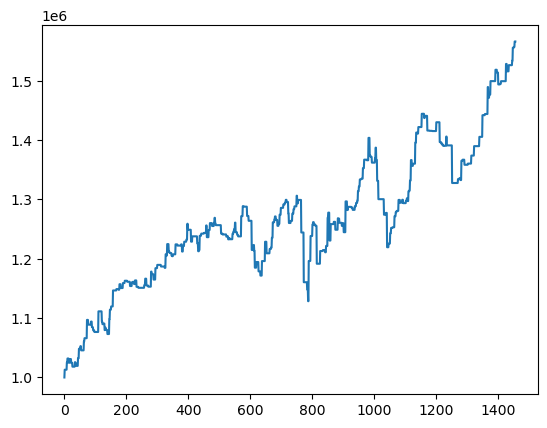

In [ ]:
plt.plot(portfolio)